#Business Diversification


---

Phase 1 project, November 2024

---

DSF-PT09 CLASS



## Overview


---

The company in concern, intends to diversify its business portfolio to purchasing and operating airplanes for commercial and private enterprises.

Due to the high capital investment required this project intends to determine the lowest risk aircraft, the company can purchase to start this new business endeavor.

The project, intends to translate the findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.


## Business Undestanding


---

### Objectives

1. Develop an accident risk frequency for the different aircraft makes and models from historical accident records
2. Develop an acquisition strategy based on potential risk portfolio for different make of aircraft
3. Evaluate and determine lowest  risk  aircraft for purchase for private and commercial enterprises


In [81]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [82]:
#importing the dataset
df=pd.read_csv('/content/AviationData.csv', encoding='latin-1', low_memory=False )

In [83]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [84]:
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


## Data Understanding


---

1. Extract the few first and last rows in the dataset to View content
2. View the  % of missing values per column and datatypes in the dataset
3. Do a statistical analysis for the numerical columns
4. View the size of the dataset
5. Visualize raw data

In [85]:
df.shape

(88889, 31)

In [86]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [88]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [89]:
df.isna().sum()

,0
Event.Id,0
Investigation.Type,0
Accident.Number,0
Event.Date,0
Location,52
Country,226
Latitude,54507
Longitude,54516
Airport.Code,38757
Airport.Name,36185


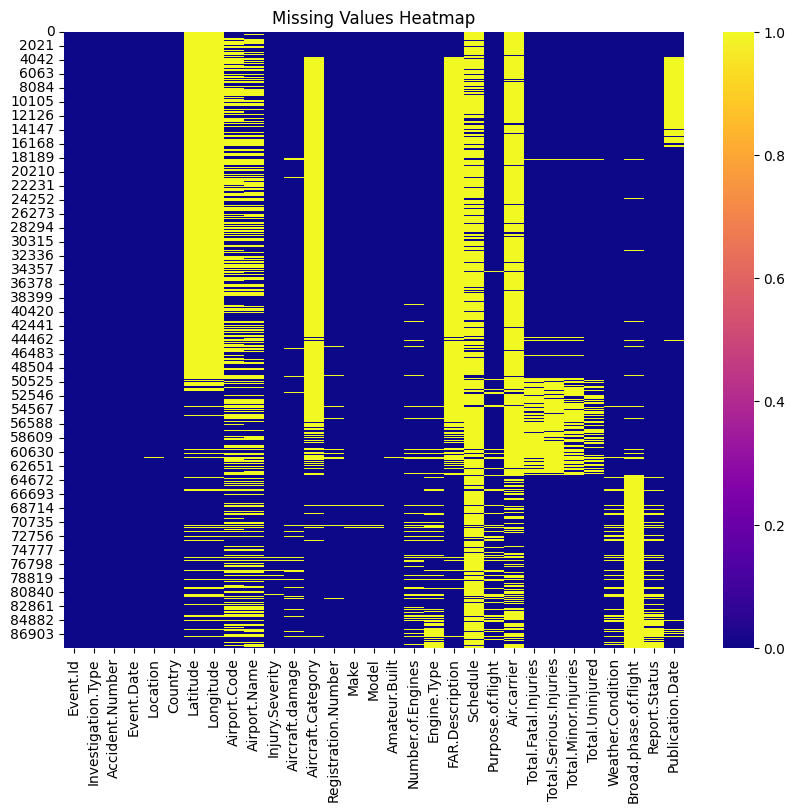

In [90]:
# Visualize the missing values
plt.figure(figsize=(10, 8))
sns.heatmap(df.isnull(), cbar=True, cmap="plasma")
plt.title("Missing Values Heatmap")
plt.show()

## Data Preparation


---

The data cleaning process will be as follows;
1. Drop columns with more than 70% missing values
2. Drop of all columns that are  not of immediate concern to the objective of low risk airplanes. For example
       
        *   Investigation.Type
        *   Registration.Number
        *   Publication.Date
        *   Airport.Code
        *   Airport.Name
2. Substitute the object type column with mode and float64 columns with mean
3. Remove fuzzy duplicates and aliases in Make, Model and Weather conditions column
4. Define the target market by country with the greatest % of available data
5. Import changes to CSV for onward processing in Tableau and visualization
6. As per the business problem a risk matrix best answers the hypothesis. In this case therefore;
      *   	Develop risk metrics
      *   Assign severity as per the string values provided in the dataset
      *   Aggregate the risk metrics
      *   Assign risk scores
      *   Develop a risk matrix
     







In [91]:
# Drop columns with more than 70% of missing data
df = df.dropna(axis=1, thresh=0.7 * df.shape[0])
print(df.columns)

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Injury.Severity', 'Aircraft.damage',
       'Registration.Number', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Report.Status', 'Publication.Date'],
      dtype='object')


In [92]:
# Drop more columns
df = df.drop(columns=['Investigation.Type', 'Publication.Date', 'Registration.Number'])

In [93]:
# View new dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Accident.Number         88889 non-null  object 
 2   Event.Date              88889 non-null  object 
 3   Location                88837 non-null  object 
 4   Country                 88663 non-null  object 
 5   Injury.Severity         87889 non-null  object 
 6   Aircraft.damage         85695 non-null  object 
 7   Make                    88826 non-null  object 
 8   Model                   88797 non-null  object 
 9   Amateur.Built           88787 non-null  object 
 10  Number.of.Engines       82805 non-null  float64
 11  Engine.Type             81793 non-null  object 
 12  Purpose.of.flight       82697 non-null  object 
 13  Total.Fatal.Injuries    77488 non-null  float64
 14  Total.Serious.Injuries  76379 non-null

In [94]:
#Dropping data before Year 1982. Too few details available in prior years
df= df[df['Event.Date'] >= '1982-01-01']

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88882 entries, 7 to 88888
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88882 non-null  object 
 1   Accident.Number         88882 non-null  object 
 2   Event.Date              88882 non-null  object 
 3   Location                88830 non-null  object 
 4   Country                 88656 non-null  object 
 5   Injury.Severity         87882 non-null  object 
 6   Aircraft.damage         85688 non-null  object 
 7   Make                    88819 non-null  object 
 8   Model                   88790 non-null  object 
 9   Amateur.Built           88780 non-null  object 
 10  Number.of.Engines       82799 non-null  float64
 11  Engine.Type             81787 non-null  object 
 12  Purpose.of.flight       82691 non-null  object 
 13  Total.Fatal.Injuries    77482 non-null  float64
 14  Total.Serious.Injuries  76374 non-null  flo

In [96]:
# fill the missing values in columns with object data type with mode
for column in df.select_dtypes(include='object'):
    df[column].fillna(df[column].mode()[0], inplace=True)

<ipython-input-96-2d2f287ce685>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)


In [97]:
# fill float64 data type columns with mean as integer if respective columns
for column in df.select_dtypes(include='float64'):
    df[column].fillna(int(df[column].mean()), inplace=True)

<ipython-input-97-eb1defcb7aad>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(int(df[column].mean()), inplace=True)


In [98]:
# Relevant data in Purpose.of.flight
df['Purpose.of.flight'].value_counts()
# relevant rows = Personal, Business and Executive/Corporate
df = df[df['Purpose.of.flight'].isin(['Personal', 'Business', 'Executive/Corporate'])]
print(df['Purpose.of.flight'].value_counts())

Purpose.of.flight
Personal    55633
Business     4018
Name: count, dtype: int64


In [99]:
# view new data set
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59651 entries, 7 to 88888
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                59651 non-null  object 
 1   Accident.Number         59651 non-null  object 
 2   Event.Date              59651 non-null  object 
 3   Location                59651 non-null  object 
 4   Country                 59651 non-null  object 
 5   Injury.Severity         59651 non-null  object 
 6   Aircraft.damage         59651 non-null  object 
 7   Make                    59651 non-null  object 
 8   Model                   59651 non-null  object 
 9   Amateur.Built           59651 non-null  object 
 10  Number.of.Engines       59651 non-null  float64
 11  Engine.Type             59651 non-null  object 
 12  Purpose.of.flight       59651 non-null  object 
 13  Total.Fatal.Injuries    59651 non-null  float64
 14  Total.Serious.Injuries  59651 non-null  flo

In [100]:
# Check duplicates
df.duplicated().sum()
# View duplicated data
df[df.duplicated()]
# Remove the duplicated data
df = df.drop_duplicates()

In [101]:
# all strings to upper casing in dataset
df = df.apply(lambda col: col.str.upper() if col.dtype == 'object' else col)

In [102]:
# For pilot purposes by start up, the target market USA is chosen because of the available data count
df['Country'].value_counts()
print(df['Country'].value_counts())


Country
UNITED STATES     54883
CANADA              283
UNITED KINGDOM      281
MEXICO              280
BRAZIL              255
                  ...  
YEMEN                 1
BENIN                 1
GABON                 1
SUDAN                 1
FRENCH GUIANA         1
Name: count, Length: 198, dtype: int64


In [103]:
# Extract the US dataset
df = df[df['Country'].str.strip().eq('UNITED STATES')]

In [104]:
# export to CSV the cleaned dataset for onward processing in tableau
df.to_csv('cleaned_aviation_data.csv', index=False)

# Assigning the cleaned dataset correctly
df_clean = df.copy()

In [120]:
#  A risk Matrix best answers the business problem in question
# Group the make and Model columns and specifiy  the funtion to apply to each risk column and regularize new column

risk_metrics = df_clean.groupby(['Make', 'Model']).agg({
    'Aircraft.damage': 'count',  # Total incidents
    'Total.Fatal.Injuries': 'mean',  # Average fatal injuries
    'Total.Serious.Injuries': 'mean',  # Average serious injuries
    'Total.Minor.Injuries': 'mean',  # Average minor injuries
    'Aircraft.damage': lambda x: x.value_counts().to_dict()  # Frequency of damage categories
}).rename(columns={'Aircraft.damage': 'Total.Incidents'})

# Reset index for readability
risk_metrics.reset_index(inplace=True)

# Display the top rows of the aggregated data
print(risk_metrics.head())

# Save the risk metrics to a CSV file for further analysis if needed
risk_metrics.to_csv("aggregated_risk_metrics.csv", index=False)


               Make           Model     Total.Incidents  Total.Fatal.Injuries  \
0              1200            G103  {'SUBSTANTIAL': 1}                   0.0   
1         177MF LLC  PITTS MODEL 12  {'SUBSTANTIAL': 1}                   0.0   
2  1977 COLFER-CHAN   STEEN SKYBOLT  {'SUBSTANTIAL': 1}                   0.0   
3        1ST FTR GP  FOCKE-WULF 190    {'DESTROYED': 1}                   1.0   
4         2003 NASH       KITFOX II  {'SUBSTANTIAL': 1}                   0.0   

   Total.Serious.Injuries  Total.Minor.Injuries  
0                     1.0                   0.0  
1                     2.0                   0.0  
2                     0.0                   1.0  
3                     0.0                   0.0  
4                     0.0                   1.0  


In [121]:
# Quantify the severity of damage. create new column to store frequencies
def calculate_damage_severity(damage):
    if isinstance(damage, str):  # Ensure it's a string
        return damage.count('Destroyed') + damage.count('Substantial')
    return 0

# Apply the filter and calculation
df['Severe.Damage.Frequency'] = df['Aircraft.damage'].apply(calculate_damage_severity)


In [122]:
# calculate the severity of score frequency for each row as string and Create new 'Severe.Damage.Frequency' to store the damage scores as int
def calculate_damage_severity(damage):
    if isinstance(damage, str):  # Ensure it's a string
        return damage.count('Destroyed') + damage.count('Substantial')
    return 0

# Apply the calculation to create a new column for 'Severe.Damage.Frequency'
df['Severe.Damage.Frequency'] = df['Aircraft.damage'].apply(calculate_damage_severity)

# Check if the new column has been added correctly and calculate the risk score
df.head()

,Event.Id,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Make,Model,Amateur.Built,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status,Severe.Damage.Frequency,Severe_Damage_Frequency
7,20020909X01562,SEA82DA022,1982-01-01,"PULLMAN, WA",UNITED STATES,NON-FATAL,SUBSTANTIAL,CESSNA,140,NO,...,RECIPROCATING,PERSONAL,0.0,0.0,0.0,2.0,VMC,PROBABLE CAUSE,0,0
8,20020909X01561,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",UNITED STATES,NON-FATAL,SUBSTANTIAL,CESSNA,401B,NO,...,RECIPROCATING,BUSINESS,0.0,0.0,0.0,2.0,IMC,PROBABLE CAUSE,0,0
9,20020909X01560,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",UNITED STATES,NON-FATAL,SUBSTANTIAL,NORTH AMERICAN,NAVION L-17B,NO,...,RECIPROCATING,PERSONAL,0.0,0.0,3.0,0.0,IMC,PROBABLE CAUSE,0,0
10,20020909X01559,FTW82DA034,1982-01-01,"HOBBS, NM",UNITED STATES,NON-FATAL,SUBSTANTIAL,PIPER,PA-28-161,NO,...,RECIPROCATING,PERSONAL,0.0,0.0,0.0,1.0,VMC,PROBABLE CAUSE,0,0
11,20020909X01558,ATL82DKJ10,1982-01-01,"TUSKEGEE, AL",UNITED STATES,NON-FATAL,SUBSTANTIAL,BEECH,V35B,NO,...,RECIPROCATING,PERSONAL,0.0,0.0,0.0,1.0,VMC,PROBABLE CAUSE,0,0


In [123]:
 # Aggregate identified risk metrics by Make and Model
 # This provides incident counts, injury trends and damage severity
 # Allows therefore risk analysis and comparisons

aggregated_metrics = df.groupby(['Make', 'Model']).agg(
    Total_Incidents=('Event.Id', 'count'),
    Average_Fatal_Injuries=('Total.Fatal.Injuries', 'mean'),
    Average_Serious_Injuries=('Total.Serious.Injuries', 'mean'),
    Average_Minor_Injuries=('Total.Minor.Injuries', 'mean'),
    Severe_Damage_Frequency=('Severe.Damage.Frequency', 'sum')
).reset_index()

# Display the first few rows to verify the aggregation
aggregated_metrics.head()


,Make,Model,Total_Incidents,Average_Fatal_Injuries,Average_Serious_Injuries,Average_Minor_Injuries,Severe_Damage_Frequency
0,1200,G103,1,0.0,1.0,0.0,0
1,177MF LLC,PITTS MODEL 12,1,0.0,2.0,0.0,0
2,1977 COLFER-CHAN,STEEN SKYBOLT,1,0.0,0.0,1.0,0
3,1ST FTR GP,FOCKE-WULF 190,1,1.0,0.0,0.0,0
4,2003 NASH,KITFOX II,1,0.0,0.0,1.0,0


In [124]:
# Ensure missing values are replaced with 0
weights = {
    'Total_Incidents': 0.4,
    'Average_Fatal_Injuries': 0.3,
    'Average_Serious_Injuries': 0.2,
    'Severe_Damage_Frequency': 0.1
}

# Calculate Risk Score
aggregated_metrics['Risk_Score'] = (
    weights['Total_Incidents'] * aggregated_metrics['Total_Incidents'] +
    weights['Average_Fatal_Injuries'] * aggregated_metrics['Average_Fatal_Injuries'].fillna(0) +
    weights['Average_Serious_Injuries'] * aggregated_metrics['Average_Serious_Injuries'].fillna(0) +
    weights['Severe_Damage_Frequency'] * aggregated_metrics['Severe_Damage_Frequency']
)

# Sort by Risk Score in ascending order to identify low-risk aircraft
low_risk_aircraft = aggregated_metrics.sort_values(by='Risk_Score', ascending=True)

# Display the top 5 low-risk aircraft
low_risk_aircraft.head()



,Make,Model,Total_Incidents,Average_Fatal_Injuries,Average_Serious_Injuries,Average_Minor_Injuries,Severe_Damage_Frequency,Risk_Score
6765,HURD/DRIFTER,XP503,1,0.0,0.0,1.0,0,0.4
7290,KILPATRICK,IV-1200,1,0.0,0.0,0.0,0,0.4
7287,KILISHEK GEORGE T,RV-8,1,0.0,0.0,0.0,0,0.4
7286,KILISHEK,RV-8,1,0.0,0.0,1.0,0,0.4
7284,KIESEL,MIDGET MUSTANG,1,0.0,0.0,1.0,0,0.4


## Data Visualization


---



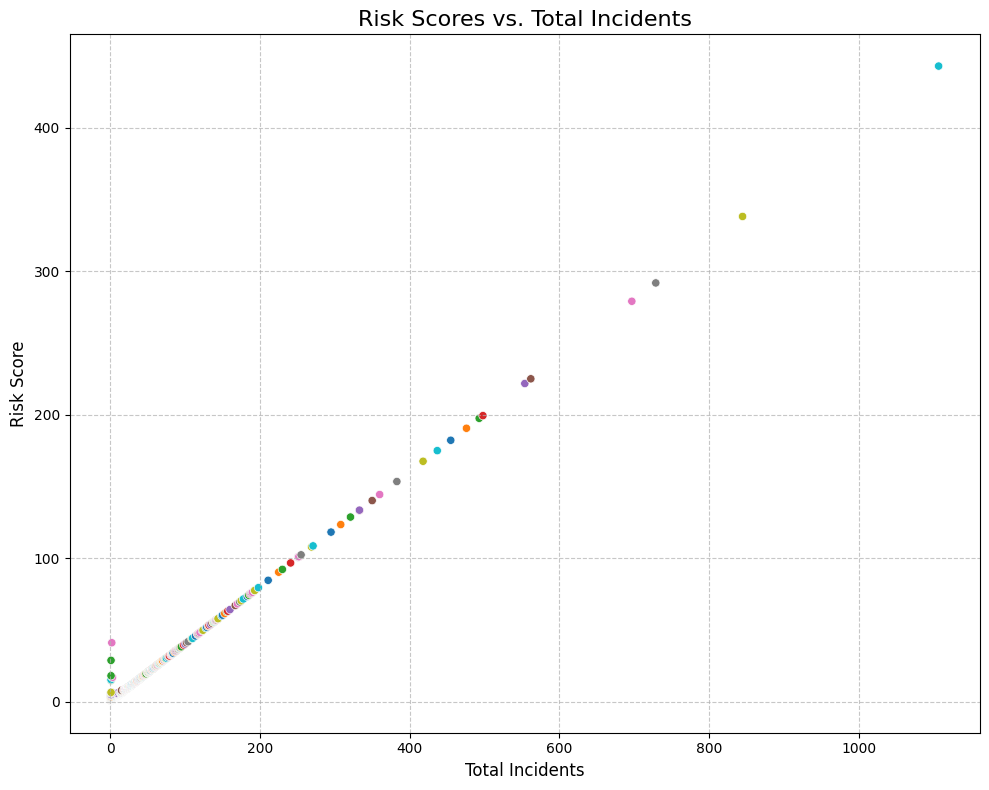

In [125]:
#
low_risk_aircraft['Make_Model'] = low_risk_aircraft['Make'] + " " + low_risk_aircraft['Model']

# Create a figure with specific size
plt.figure(figsize=(10, 8))

# Create the scatter plot using seaborn
sns.scatterplot(
    data=low_risk_aircraft,
    x='Total_Incidents',
    y='Risk_Score',
    hue='Make_Model',
    palette='tab10',
    legend=False
)

# Title and labels with customized font sizes
plt.title('Risk Scores vs. Total Incidents', fontsize=16)
plt.xlabel('Total Incidents', fontsize=12)
plt.ylabel('Risk Score', fontsize=12)

# Add gridlines for better readability
plt.grid(linestyle='--', alpha=0.7)

# Ensure everything fits within the plot
plt.tight_layout()

# Show the plot
plt.show()

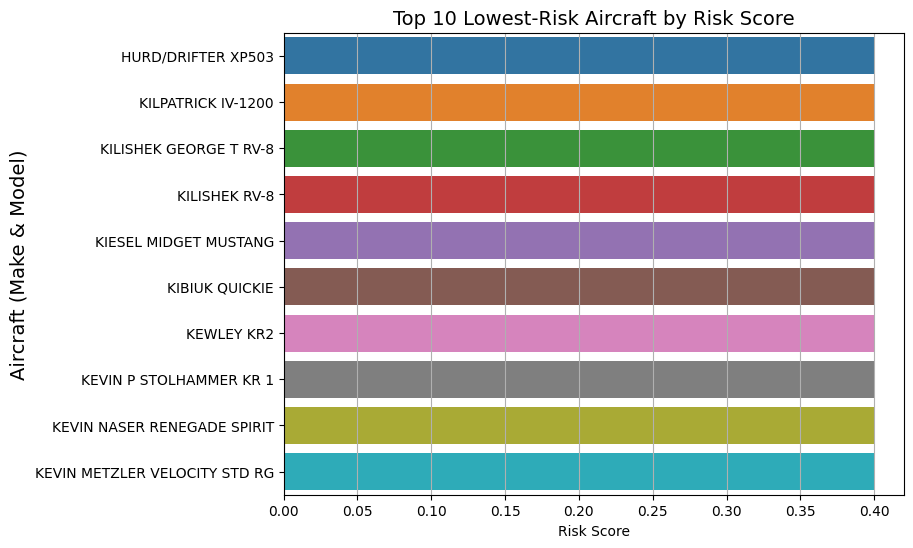

In [126]:
# combine the make and aircraft model data in to one column
low_risk_aircraft['Make_Model'] = low_risk_aircraft['Make'] + " " + low_risk_aircraft['Model']

# View the top 10 lowest risk aircraft
top_low_risk = low_risk_aircraft.head(10)

plt.figure(figsize=(8, 6))
sns.barplot(
    data=top_low_risk,
    x='Risk_Score',
    y='Make_Model',
    hue='Make_Model',
    palette='tab10',
    order=top_low_risk.sort_values('Risk_Score')['Make_Model']
)
plt.title('Top 10 Lowest-Risk Aircraft by Risk Score', fontsize=14)
plt.xlabel('Risk Score', fontsize=10)
plt.ylabel('Aircraft (Make & Model)', fontsize=14)
plt.grid(axis='x', linestyle='-')
plt.show()

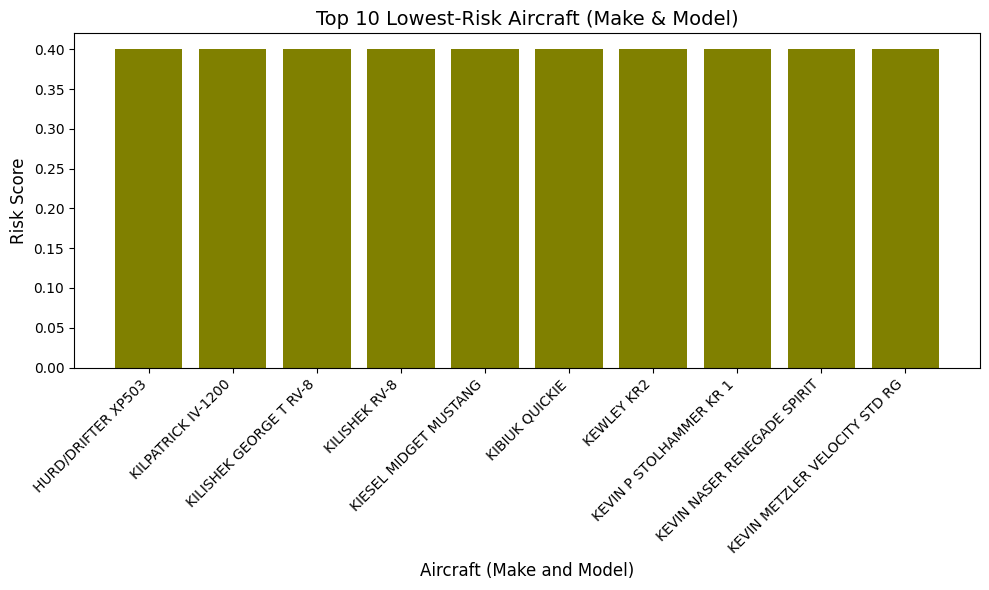

Acquisition Strategy:
Make: HURD/DRIFTER, Model: XP503, Risk Score: 0.40
Make: KILPATRICK, Model: IV-1200, Risk Score: 0.40
Make: KILISHEK GEORGE T, Model: RV-8, Risk Score: 0.40
Make: KILISHEK, Model: RV-8, Risk Score: 0.40
Make: KIESEL, Model: MIDGET MUSTANG, Risk Score: 0.40
Make: KIBIUK, Model: QUICKIE, Risk Score: 0.40
Make: KEWLEY, Model: KR2, Risk Score: 0.40
Make: KEVIN P STOLHAMMER, Model: KR 1, Risk Score: 0.40
Make: KEVIN NASER, Model: RENEGADE SPIRIT, Risk Score: 0.40
Make: KEVIN METZLER, Model: VELOCITY STD RG, Risk Score: 0.40


In [127]:
# Sort aircraft by Risk Score in ascending order
lowest_risk_aircraft = aggregated_metrics[['Make', 'Model', 'Risk_Score']].sort_values(by='Risk_Score', ascending=True)

# Select top 5 lowest-risk models
top_low_risk_aircraft = lowest_risk_aircraft.head(10)

# Plot the Risk Score for the top 5 lowest-risk aircraft
plt.figure(figsize=(10, 6))
plt.bar(
    top_low_risk_aircraft['Make'] + " " + top_low_risk_aircraft['Model'],
    top_low_risk_aircraft['Risk_Score'],
    color='olive'
)
plt.xlabel('Aircraft (Make and Model)', fontsize=12)
plt.ylabel('Risk Score', fontsize=12)
plt.title('Top 10 Lowest-Risk Aircraft (Make & Model)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show plot
plt.show()

# Display acquisition strategy
print("Acquisition Strategy:")
for index, row in top_low_risk_aircraft.iterrows():
    print(f"Make: {row['Make']}, Model: {row['Model']}, Risk Score: {row['Risk_Score']:.2f}")


### Findings


---



### Conclusion


---



The data provided could not explicitly give a dependable metrics to evaluate low risk aircraft. However, hypothethically Risk score was used to develop the acquisition matrix for the business problem stated.

The following Aircraft models are the lowest risk in ascending order;

    1.   Make: HOMER DAVIS, Model: RV4, Risk Score: 0.40
    2.   Make: KAUFFMAN, Model: BEDE IV, Risk Score: 0.40
    3.   Make: KASHPUREFF, Model: NIEUPORT II, Risk Score: 0.40
    4.   Make: KARMY, Model: ROTORWAY EXEC, Risk Score: 0.40
    5.   Make: KARL & DOT, INC., Model: COMP AIR 7SL, Risk Score: 0.40

### Recommendations


---


As per the observations made from the data set given. Recommendations are as follows;

1. The company should source for  Continuously updated comprehensive risk data to evaluate aircraft makes/models based on current safety trends, accident reports, and recent proven technological advancements. The data set provided  for analysis should ghave data can be used to develop cost efficiency and Valuatio, and projected profitability.

2. Align acquisition decisions with the company's risk appetite and operational needs. For exampl while private users might prioritize safety commercial operators may balance safety with operational efficiency and cost

3. Upon acquisition the company should employ a fleet management strategy to evaluate emerging risks.

4. Risk Mitigationshould be carried out for both private and commercial purchases, aircraft that offer advanced safety technologies

5. Aircraft with higher risk scores are financially prohibitive for the startup company because of higher insurance premiums. Considerin the eterprise in question is a startup the full financial impact should be assessed when determining which aircraft to purchase to ensure profitability


In [128]:
df.to_csv('cleaned_data.csv', index=False)
from google.colab import files
files.download('cleaned_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>